<a href="https://colab.research.google.com/github/Astorgato/Data_Science/blob/main/Minor/Clase_17_Regresio%CC%81n_lineal_y_lo%CC%81gistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejemplo práctico regresión lineal y regresión logística

Lecturas propuestas:

https://realpython.com/linear-regression-in-python/

https://scikit-learn.org/stable/modules/linear_model.html

https://towardsdatascience.com/introduction-to-linear-regression-in-python-c12a072bedf0


https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9

https://github.com/SSaishruthi/Linear_Regression_Detailed_Implementation/blob/master/Linear_Regression.ipynb

https://towardsdatascience.com/an-introduction-to-linear-regression-for-data-science-9056bbcdf675

Se empieza cargando un conjunto de datos para realizar una regresión lineal simple. El conjunto de datos utilizado es "House Sales in King County, USA"

Este conjunto de datos contiene precios de venta de casas para el condado de King, que incluye a Seattle. Incluye viviendas vendidas entre mayo de 2014 y mayo de 2015. Es un gran conjunto de datos para evaluar modelos de regresión simples.

Link propuesto: https://www.kaggle.com/datasets/harlfoxem/housesalesprediction

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#**A continuación se trabaja con un conjunto de datos simplificado, osea que se eliminan algunas variables**

In [ ]:
url = 'https://github.com/dhyan6/data-science-projects/blob/main/kc_house_data.csv?raw=true'
houses = pd.read_csv(url)
houses.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,zipcode
0,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0,98178
1,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400,98125
2,180000.0,2,1.00,770,10000,1.0,3,6,770,0,98028
3,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910,98136
4,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0,98074


In [ ]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   condition      21613 non-null  int64  
 7   grade          21613 non-null  int64  
 8   sqft_above     21613 non-null  int64  
 9   sqft_basement  21613 non-null  int64  
 10  zipcode        21613 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 1.8 MB


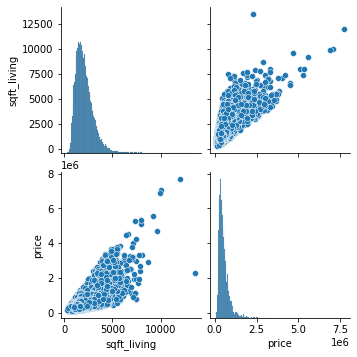

In [ ]:
import seaborn as sns
sns.pairplot(houses.loc[:,['sqft_living','price']])

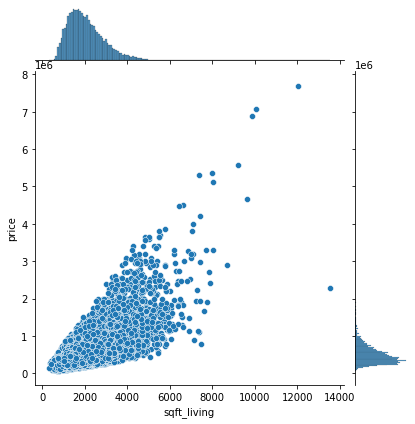

In [ ]:
sns.jointplot(x=houses['sqft_living'], y=houses['price'], data=houses)

#Separando el conjunto de datos en entrenamiento y prueba para realizar una regresión lineal simple


In [ ]:
from sklearn.model_selection import train_test_split

# Define our predictor and target variables
X = houses[['sqft_living']]
Y = houses['price']
# Create four groups using train_test_split. By default, 75% of data is assigned to train, the other 25% to test.
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, test_size=0.4)


#
print('Train - Predictors shape', x_train.shape)
print('Test - Predictors shape', x_test.shape)
print('Train - Target shape', y_train.shape)
print('Test - Target shape', y_test.shape)

Train - Predictors shape (12967, 1)
Test - Predictors shape (8646, 1)
Train - Target shape (12967,)
Test - Target shape (8646,)


#Se genera el modelo de regresión lineal

In [ ]:
x_test

,sqft_living
17384,1430
722,4670
2680,1440
18754,1130
14554,3180
...,...
10182,1250
1552,1180
8047,2350
12220,3020


In [ ]:
# Import the library
from sklearn.linear_model import LinearRegression
# Initialize a linear regression model object
lr = LinearRegression()
# Fit the linear regression model object to our data
lr.fit(x_train, y_train)
# Print the intercept and the slope of the model
print('lr.intercept_')
print(lr.intercept_)
print('lr.coef_')
print(lr.coef_)
#Predicting the prices
pred = lr.predict(x_test)
print("")
print("")
print("price predicted:")
print(pred)

lr.intercept_
-28204.123707409482
lr.coef_
[273.5008285]


price predicted:
[ 362902.06104477 1249044.7453784   365637.06932976 ...  614522.82326296
  797768.37835664  529737.56642857]


In [ ]:
x_test

,sqft_living
17384,1430
722,4670
2680,1440
18754,1130
14554,3180
...,...
10182,1250
1552,1180
8047,2350
12220,3020


In [ ]:
sum(np.abs(pred - y_test))/len(x_test)

173125.96099873816

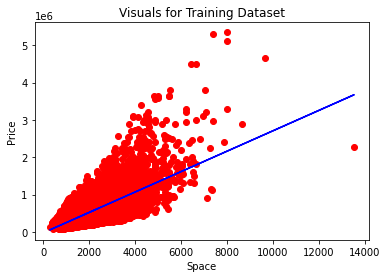

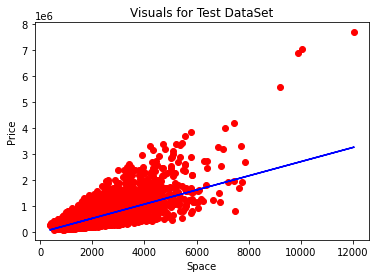

In [ ]:
#Visualizing the training Test Results
plt.scatter(x_train, y_train, color= 'red')
plt.plot(x_train, lr.predict(x_train), color = 'blue')
plt.title ("Visuals for Training Dataset")
plt.xlabel("Space")
plt.ylabel("Price")
plt.show()

#Visualizing the Test Results
plt.scatter(x_test, y_test, color= 'red')
plt.plot(x_test, lr.predict(x_test), color = 'blue')
plt.title("Visuals for Test DataSet")
plt.xlabel("Space")
plt.ylabel("Price")
plt.show()

#Se verifica la precisión del modelo

- Primero con MSE

In [ ]:
#Define a set of predictions for y based on subset x_test
y_pred = lr.predict(x_test)
# Import modules
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 173125.9609987379
Mean Squared Error: 71445134253.12183
Root Mean Squared Error: 267292.2263237781


In [ ]:
display(x_test)
display(y_test)

,sqft_living
17384,1430
722,4670
2680,1440
18754,1130
14554,3180
...,...
10182,1250
1552,1180
8047,2350
12220,3020


17384     297000.0
722      1580000.0
2680      562100.0
18754     631500.0
14554     780000.0
           ...    
10182     357000.0
1552      265900.0
8047     1200000.0
12220     530000.0
16974     580000.0
Name: price, Length: 8646, dtype: float64

Se tienen errores demasido altos.

Ahora se calcula el valor de R cuadrado.

In [ ]:
# Import r2_score module
from sklearn.metrics import r2_score
# Print R2 Score

print('R2 Score', r2_score(y_test, y_pred))

R2 Score 0.48305523147872154


R-Cuadrado = 0.48

Esto significa que el modelo lineal explica o predice el 48% de la variación en los datos. Es un buen comienzo.

# Regresión lineal múltiple
Ahora realicemos el proceso para una regresión lineal multiple, pero antes comprobemos los supuestos

### Supuesto 1, linealidad de las variables. Se requiere análisis visual.

<Figure size 720x720 with 0 Axes>

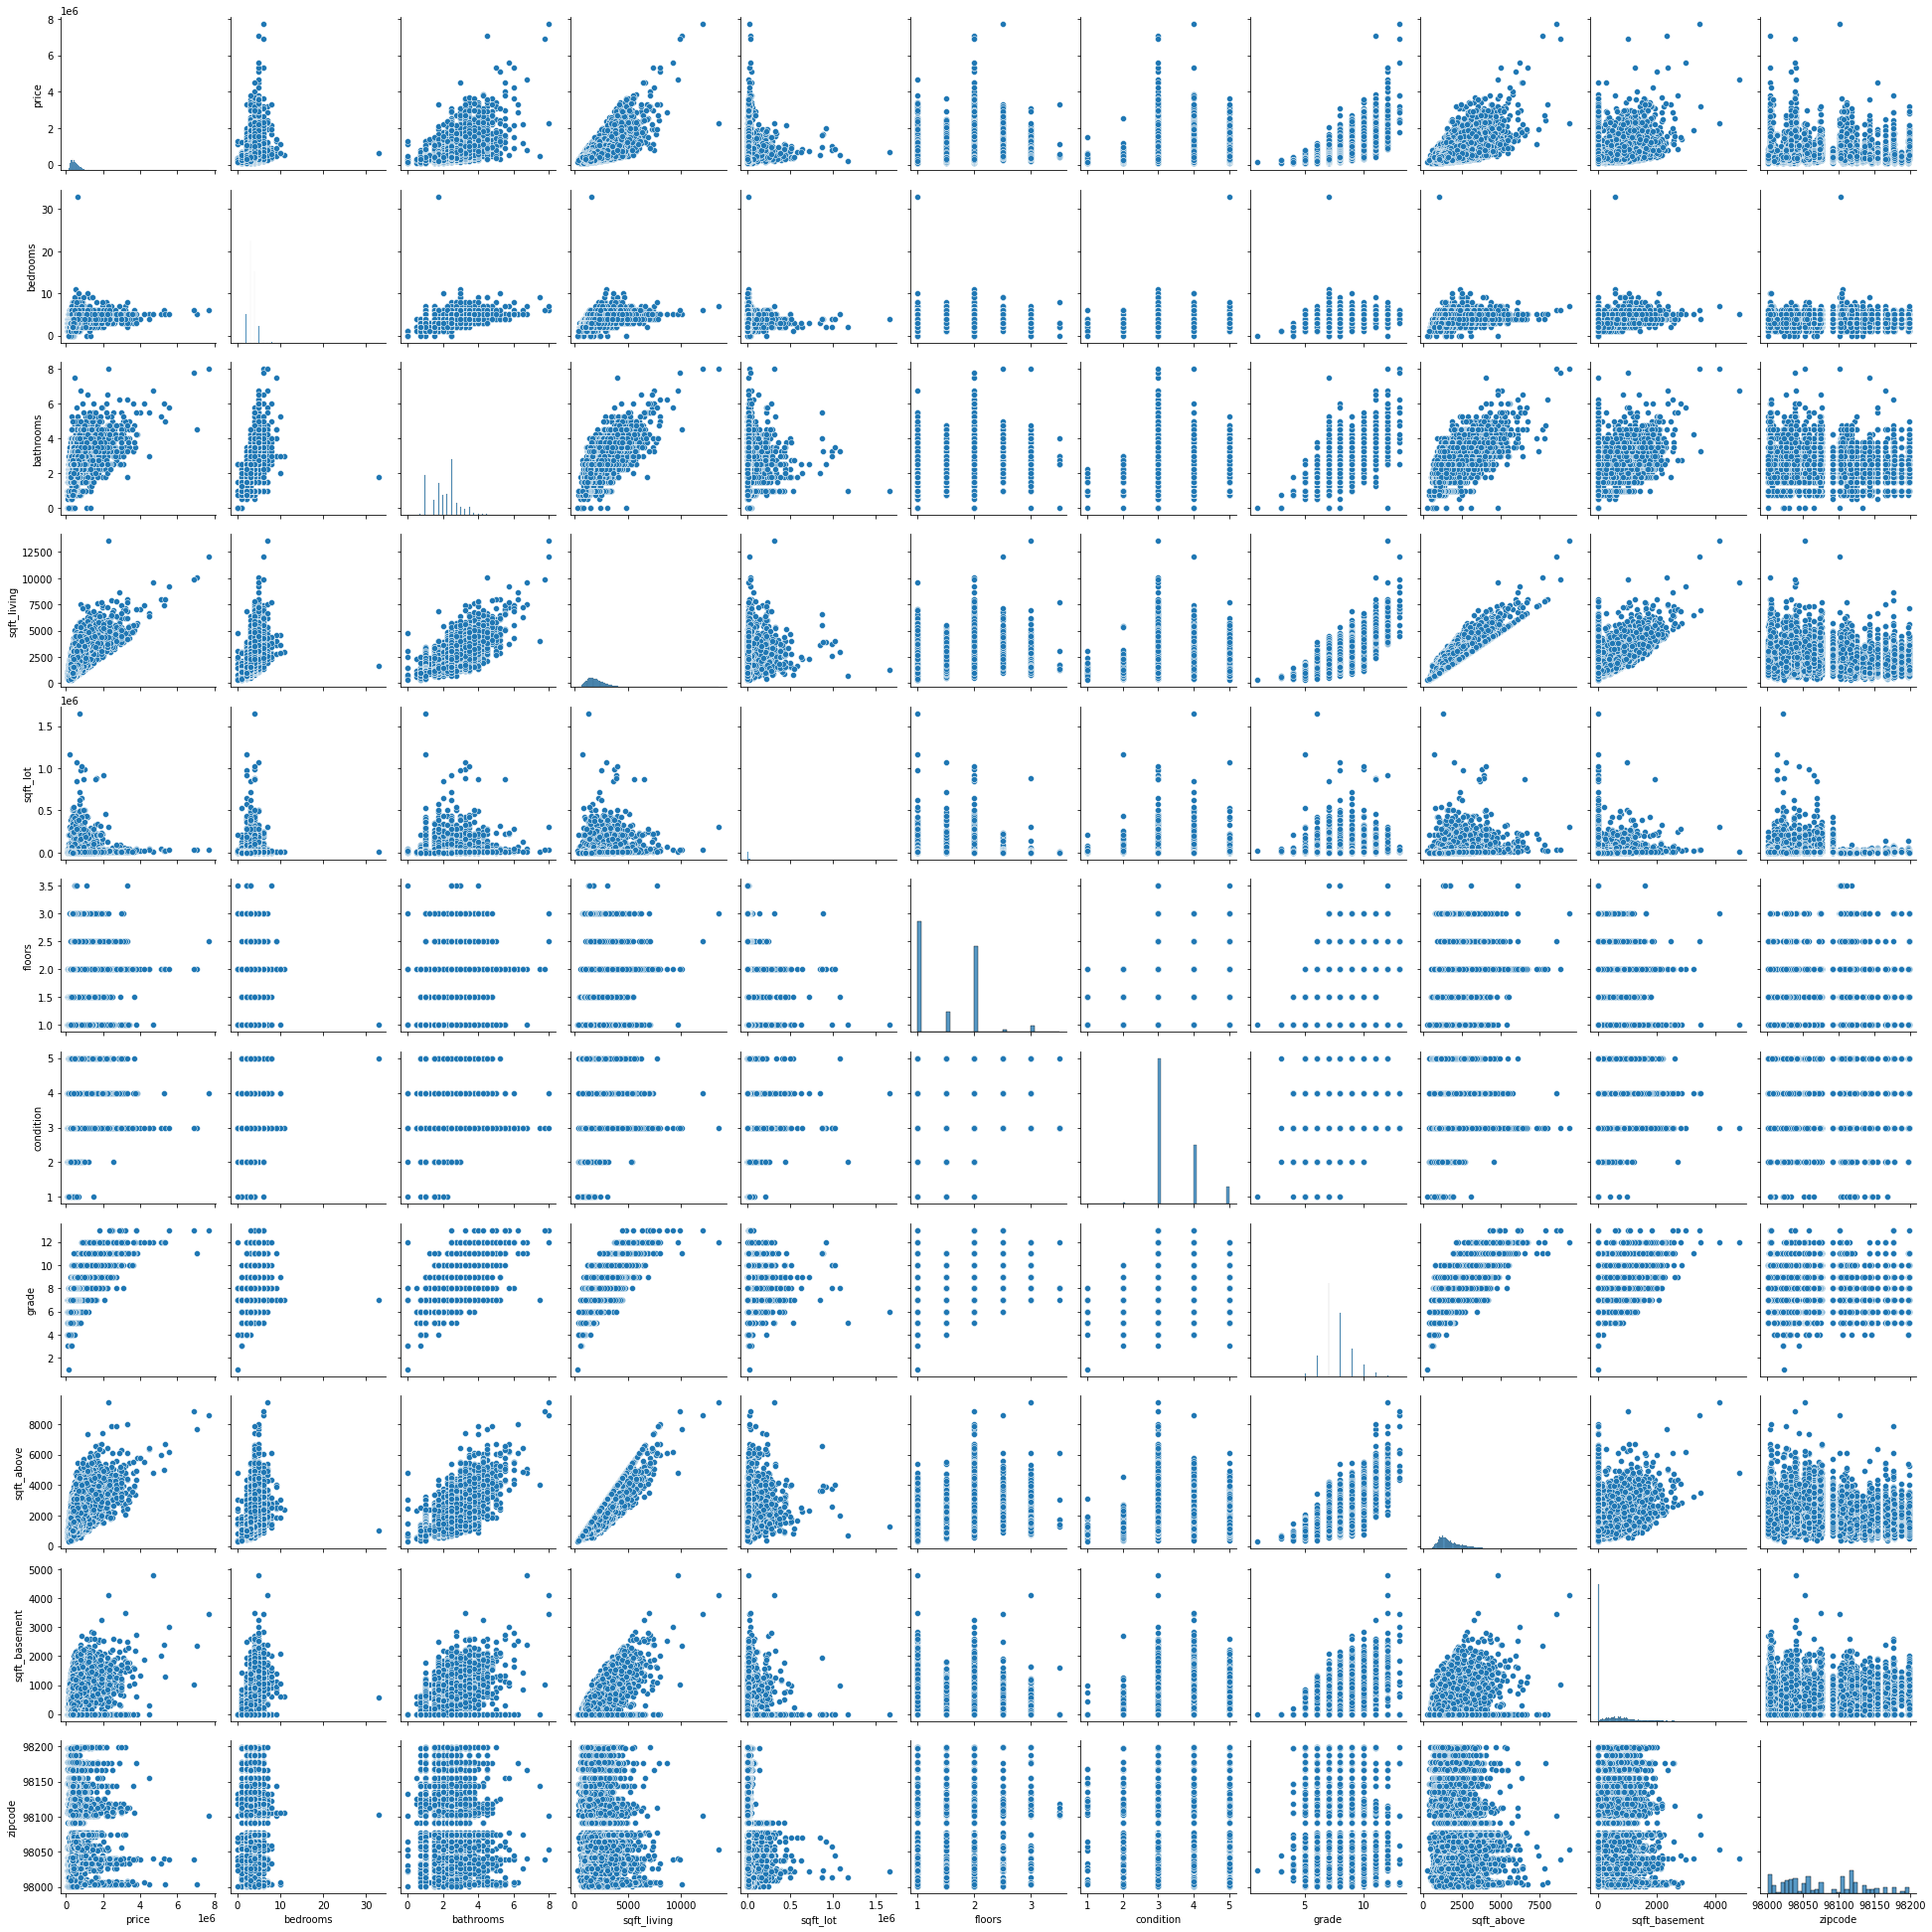

In [ ]:
plt.figure(figsize=(10, 10))
sns.pairplot(houses)

Al analizar los gráficos de "price" con las demás variables, pareciera que no se cumple el supuesto de linealidad.

### Supuesto 2: Se comprueba normalidad de una variable.

Para esto se utiliza el Test "Anderson-Darling", que prueba la hipótesis nula de que una muestra se extrae de una población que sigue una distribución particular. Para la prueba de Anderson-Darling, los valores críticos dependen de la distribución contra la que se esté probando. Este test funciona para distribuciones normales, exponenciales, logísticas o Gumbel.

In [ ]:
#perform Anderson-Darling Test
from scipy.stats import anderson
anderson_result = anderson(houses.loc[:,'sqft_living'], dist = 'norm')
print(anderson_result)

AndersonResult(statistic=326.9742778731379, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


El estadístico de prueba es **326,974**. Podemos comparar este valor con cada valor crítico que corresponde a cada nivel de significancia para ver si los resultados de la prueba son significativos. Por ejemplo:

- El valor crítico para α = 0,01 es  1,092 . Debido a que la estadística de prueba (326,974) es mayor que este valor crítico, los resultados son significativos a un nivel de significancia de 0,01.

- El valor crítico para α = 0,025 es 0,918. Debido a que la estadística de prueba (326,974) es mayor que este valor crítico, los resultados son significativos a un nivel de significancia de 0,025.

- Y así. Podemos ver que los resultados de la prueba son significativos en todos los niveles de significancia, lo que indica que se rechaza la hipótesis nula de la prueba. **Por lo tanto, tenemos evidencia suficiente para decir que los datos "sqft_living" de la muestra no se distribuyen normalmente.**


Links propuestos:
https://www.statology.org/anderson-darling-test-python/

https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/

#Supuesto 3, Independencia de las variables. Se utiliza una diagrama de correlación

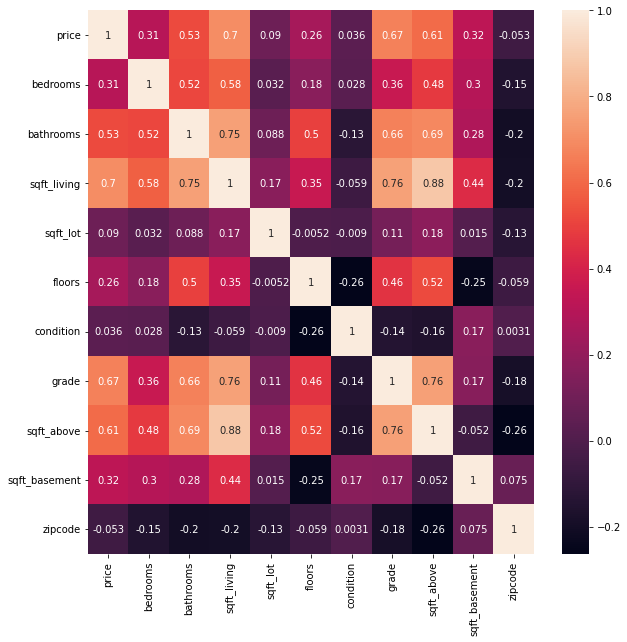

In [ ]:
plt.figure(figsize=(10, 10))
correlations = houses[1:].corr()
sns.heatmap(correlations, annot=True)

#Existen algunas correlaciones altas.


Debido a que no se cumplen los supuestos, se debiesen hacer modificaciones a las variables para normalizarlas y para eliminar la correlación.  Por ahora, vamos a pasar por alto los supuestos.

Sin embargo, según lo visto en clases, **actividad pa la casa**:

1. Realizar transformaciones en las variables para que sigan una distribución normal.
2. Eliminar las correlaciones altas.
3. Verificar si la precisión del modelo mejora.



In [ ]:
#Desarrollar aquí

A continuación, asumiendo que los supuestos se cumplen, se procede a calcular la regresión lineal multiple

#Primero se visualizan algunas variables y la cantidad de habitaciones

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x720 with 0 Axes>

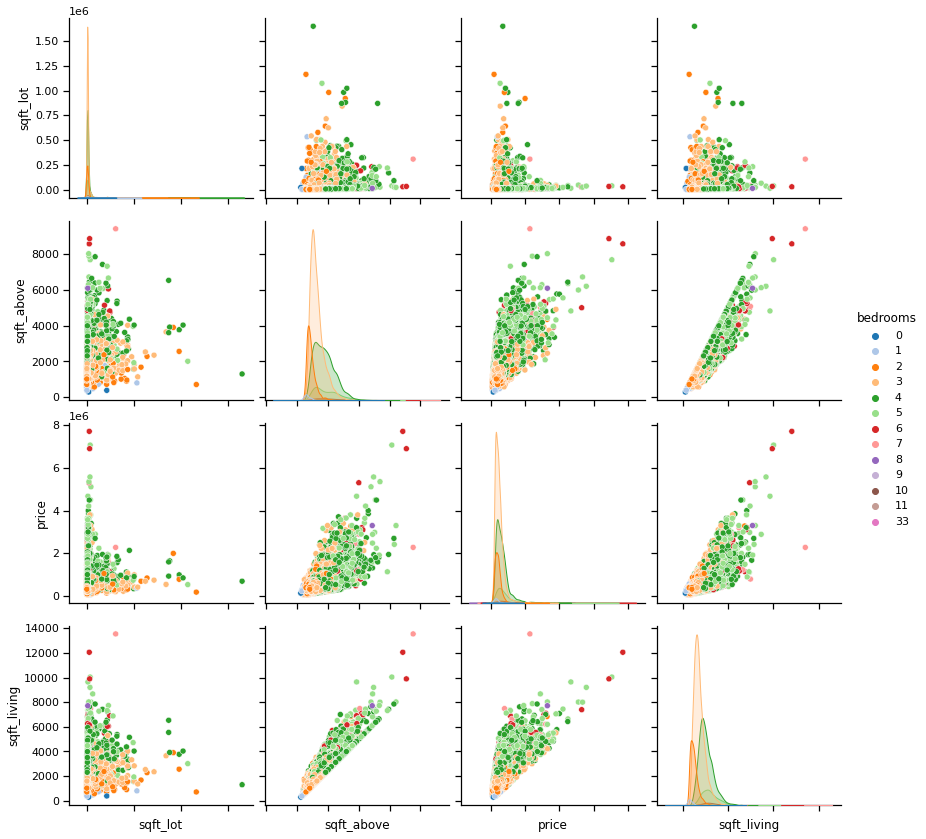

In [ ]:
#understanding the distribution with seaborn
plt.figure(figsize=(10, 10))
with sns.plotting_context("notebook"):
    g = sns.pairplot(houses[['sqft_lot','sqft_above','price','sqft_living','bedrooms']],
                 hue='bedrooms', palette='tab20',size=3)
g.set(xticklabels=[]);

#A continuación se realiza la regresión lineal multiple

In [ ]:
#separating independent and dependent variable
X = houses.iloc[:,1:].values
Y = houses.iloc[:,0].values
#splitting dataset into training and testing dataset
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state = 0)

In [ ]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(x_test)

In [ ]:
regressor.intercept_

-62565157.46969292

In [ ]:
regressor.coef_

array([-4.08122958e+04, -1.62952417e+04,  1.56702316e+02, -1.77271759e-01,
       -7.25946350e+03,  6.09147694e+04,  1.08655756e+05,  5.58174728e+01,
        1.00884843e+02,  6.30086435e+02])

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# Print R2 Score
print('R2 Score:', r2_score(y_test, y_pred))

Mean Absolute Error: 155211.68696985237
Mean Squared Error: 58296225778.812965
Root Mean Squared Error: 241446.1136129819
R2 Score: 0.5617336805088873


Mejoró la medida del R cuadrado, sin embargo, sigue siengo un mal regresor.

### **Otra actividades propuestas:**
1. Generar una regresión lineal multiple del conjunto de datos original (Link: https://www.kaggle.com/datasets/harlfoxem/housesalesprediction?select=kc_house_data.csv).
2. Calcular el R cuadrado ajustado
3. Comprobar los supuestos de los errores


**NOTA:** Una biblioteca más avanzada es "statsmodels". A continuación un tutorial para regresión lineal y análisis de regresión lineal: https://medium.com/evidentebm/linear-regression-using-statsmodels-d0db5fef16bb

**OTRAS TAREAS:**

**Tanto para el regresor lineal como logístico se deben escalar los datos (Utilizar el código de normalización visto en clases de laboratorio).**

**Valores cero en las variables independientes se deben trabajar (eliminar filas o imputar datos).**

#**Ahora se trabaja con la regresión logística**

#Fuentes:

https://www.datacamp.com/tutorial/understanding-logistic-regression-python


https://realpython.com/logistic-regression-python/#:~:text=The%20logistic%20regression%20function%20%F0%9D%91%9D(%F0%9D%90%B1)%20is%20the%20sigmoid%20function,that%20the%20output%20is%200.


https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8


In [ ]:
# Para acceder a los archivos del gdrive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


A continuación, se utiliza el comando "cd", que corresponde a Change Directory, por lo que luego del comando "cd" se debe pegar la ruta en donde se dejó la base de datos en Google Drive. Todos deben pegar una ruta distinta, la cual debe ser encontrada en el simbolo de carpeta que se presenta a la izquierda (abajo del simbolo "{X}"). Deben presionar sobre el simbolo de carpeta, entrar a "gdrive", luego "MyDrive" y luego llegar a la carpeta donde guardó su archivo, cuando encuentre la carpeta donde está la base de datos que quiere cargar, seleccione los tres puntos y luego la opción "copiar la ruta de acceso". Finalmente, donde se ejecuta el comando cd, borren la ruta antigua y peguen su ruta.

In [ ]:
cd /content/gdrive/MyDrive/2022/Universidad/TIC I 1-2022/Clases/Cátedra/Semana 9

[Errno 2] No such file or directory: '/content/gdrive/MyDrive/2022/Universidad/TIC I 1-2022/Clases/Cátedra/Semana 9'
/content


In [ ]:
cd /content/gdrive/MyDrive/2022/Universidad/TIC I 1-2022/Clases/Cátedra/Semana 9

In [ ]:
#import pandas
import pandas as pd
# load dataset
pima = pd.read_csv("gdrive/MyDrive/Copia de diabetes.csv")
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#split dataset in features and target variable
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure',  'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = pima[feature_cols] # Features
y = pima.Outcome # Target variable

In [ ]:
# split X and y into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [ ]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred, normalize="true")
cnf_matrix

array([[0.88461538, 0.11538462],
       [0.40322581, 0.59677419]])

Text(0.5, 257.44, 'Predicted label')

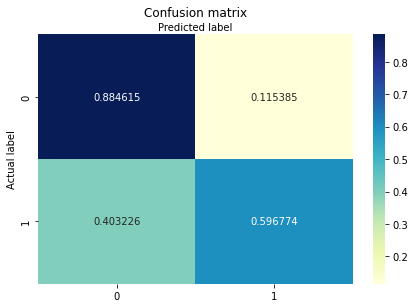

In [ ]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7916666666666666
Precision: 0.7115384615384616
Recall: 0.5967741935483871


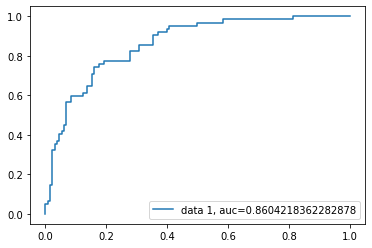

In [ ]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Se debe destacar que el código de regresión logística recien ejecutado carece de la comprobación de supuestos. A continuación se deja un link con los supuestos que se deben probar: https://www.statology.org/assumptions-of-logistic-regression/


**NOTA:** Una biblioteca más avanzada es "statsmodels". A continuación un tutorial para regresión logística: https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8